# Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## **Data Dictionary**
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

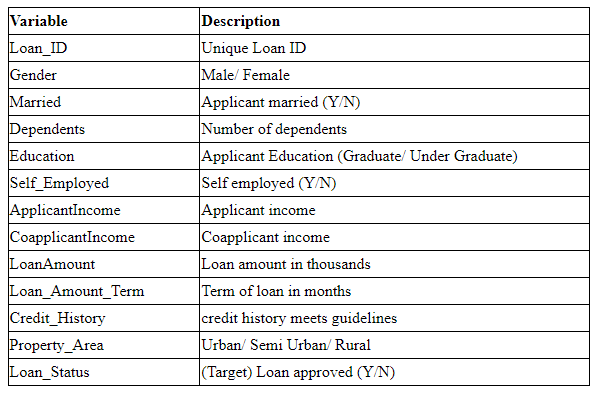


Test file: CSV containing the customer information for whom loan eligibility is to be predicted

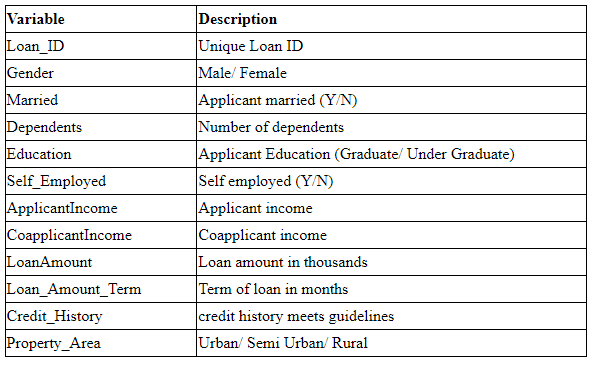

# What is hypothesis generation?
This is a very important stage in any data science/machine learning pipeline. It involves
understanding the problem in detail by brainstorming as many factors as possible which can
impact the outcome. 

It is done by understanding the problem statement thoroughly and before
looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for
this loan prediction problem):

* Salary: Applicants with high income should have more chances of loan approval.






* Previous history: Applicants who have repayed their previous debts should have higher
chances of loan approval.

* Loan amount: Loan approval should also depend on the loan amount. If the loan amount is
less, chances of loan approval should be high.

* Loan term: Loan for less time period and less amount should have higher chances of
approval.

* EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan
approval.
These are some of the factors which i think can affect the target variable, you can come up with
many more factors.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

Lets make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [3]:
train_original = train.copy()
test_original = test.copy()

Structure of train & Test Datasets

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable.

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

We can see there are three format of data types:
* object: Object format means variables are categorical. Categorical variables in our dataset
are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area,
Loan Status
* int64: It represents the integer variables. ApplicantIncome is of this format.

* float64: It represents the variable which have some decimal values involved. They are alsobnumerical variables. 
Numerical variables in our dataset are: Coapplicantincome,
LoanAmount, Loan _Amount_Term, and Credit _History
Let's look at the shape of the dataset.

In [8]:
train.shape

(614, 13)

In [9]:
test.shape

(367, 12)

**In this section, we will do univariate analysis.** It is the simplest form of analyzing data where we
examine each variable individually. 

* For categorical features we can use frequency table or bar
plots which will calculate the number of each category in a particular variable. 

* For numerical
features, probability density plots can be used to look at the distribution of the variable.


* Target Variable
We will first look at the target variable, i.e., Loan _Status. As it is a categorical variable, let us look
at its frequency table, percentage distribution and bar plot.
Frequency table of a variable will give us the count of each category in that variable.

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Ratio of proportion of Categories

In [11]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

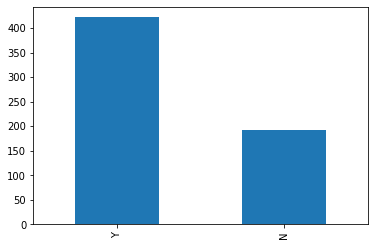

In [12]:
train['Loan_Status'].value_counts().plot.bar()

* The loan of 422 (around 69%) people out of 614 was approved.

* Now lets visualize each variable separately. Different types of variables are Categorical, ordinal
and numerical.
1. Categorical features: These features have categories (Gender, Married, Self_Employed,
Credit History, Loan_Status)
2. Ordinal features: Variables in categorical features having some order involved
(Dependents, Education, Property Area)
3. Numerical features: These features have numerical values (Applicantincome,
CoapplicantIncome, LoanAmount, Loan Amount Term)
* Let's visualize the categorical and ordinal features first

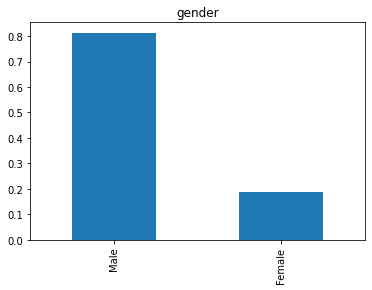

In [13]:
train['Gender'].value_counts(normalize=True).plot.bar(title = "gender")

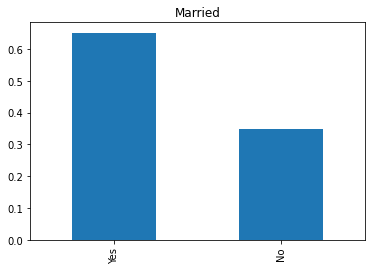

In [14]:
train['Married'].value_counts(normalize=True).plot.bar(title = "Married")

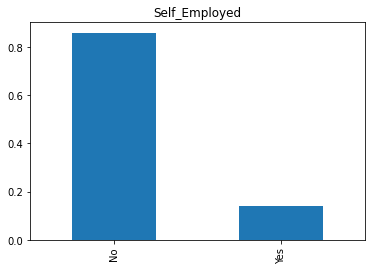

In [15]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title = "Self_Employed")

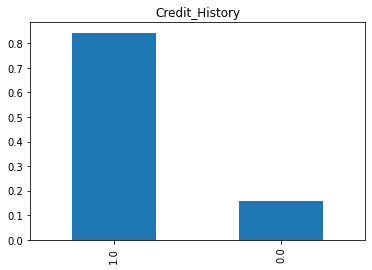

In [16]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title = "Credit_History")

**It can be inferred from the above bar plots that:**
1. 80% applicants in the dataset are male.
2. Around 65% of the applicants in the dataset are married.
3. Around 15% applicants in the dataset are self employed.
4. Around 85% applicants have repaid their debts.
Now let's visualize the ordinal variables.

* Independent Variable (Ordinal) 

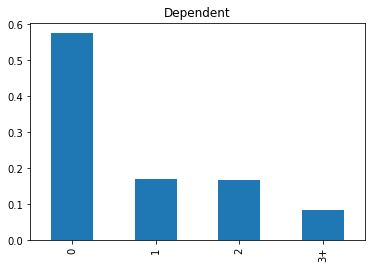

In [17]:
train['Dependents'].value_counts(normalize=True).plot.bar(title = "Dependent")

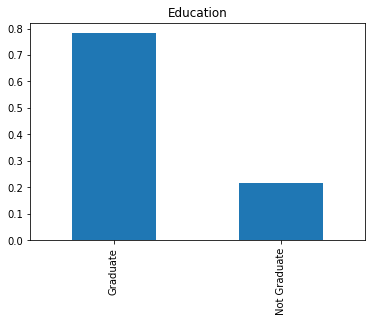

In [18]:
train['Education'].value_counts(normalize=True).plot.bar(title = "Education")

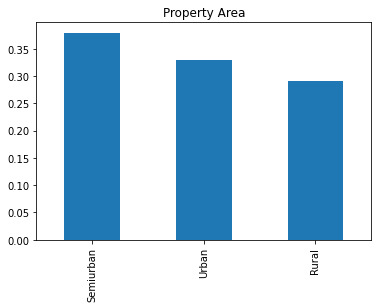

In [19]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title = "Property Area")

Following inferences can be made from the above bar plots:
1. Most of the applicants don't have an dependents.
2. Around 80% of the applicants are Graduate.
3. Most of the applicants are from Semiurban area.


* **Independent Variable (Numerical)**

Till now we have seen the categorical and ordinal variables and now lets visualize the numerical
variables. Lets look at the distribution of Applicant income first.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


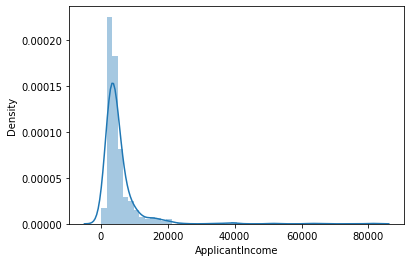

In [20]:
sns.distplot(train['ApplicantIncome'])

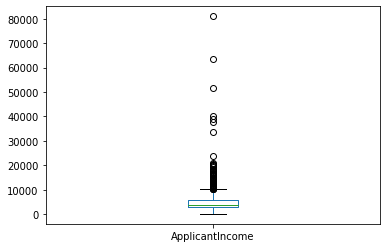

In [21]:
train["ApplicantIncome"].plot.box()

* It can be inferred that most of the data in the distribution of applicant income is towards left
which means it is not normally distributed. 
* We will try to make it normal in later sections as
algorithms works better if the data is normally distributed.

* The boxplot confirms the presence of a lot of outliers/extreme values. 
* This can be attributed to
the income disparity in the society. 

Part of this can be driven by the fact that we are looking at
people with different education levels. 

Let us segregate them by Education:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


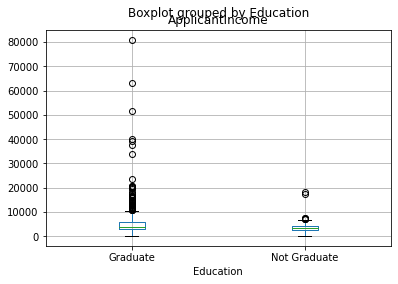

In [22]:
train.boxplot(column="ApplicantIncome", by = "Education")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Let's look at coapplicant income distribution.

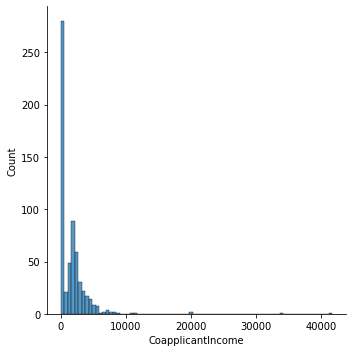

In [23]:
sns.displot(train['CoapplicantIncome'])

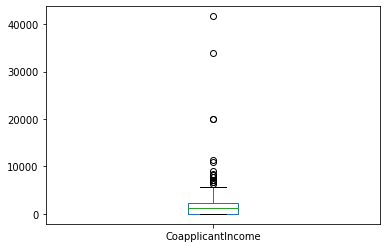

In [24]:
train["CoapplicantIncome"].plot.box()

We see a similar distribution as that of the applicant income. 
* Majority of coapplicant's income
ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not
normally distributed.

Let's look at the distribution of LoanAmount variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


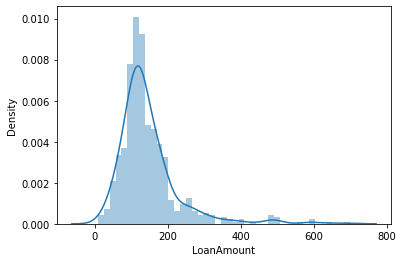

In [25]:
sns.distplot(train["LoanAmount"])

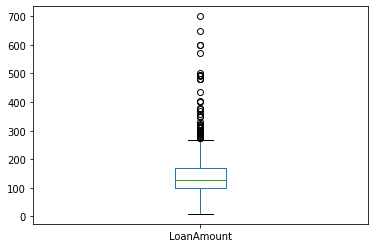

In [26]:
train['LoanAmount'].plot.box()

We can see a lot of outliers in this variable and the distributuion is failrly normal. We will treat the outliers later.

Lets recall some of the hypotheses that we generated earlier:
* Applicants with high income should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan
approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, chances
of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, higher the chances of loan
approval.
* Lets try to test the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again
with respect to the target variable.

1. Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent
variables. Let us look at the stacked bar plot now which will give us the proportion of approved
and unapproved loans.


In [27]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])

In [28]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [29]:
from pandas.core.reshape.pivot import crosstab
help(crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays passed.

In [30]:
Gender.sum(1).astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

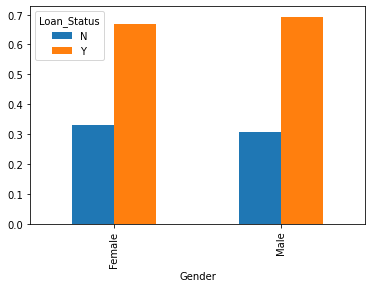

In [31]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked=False)

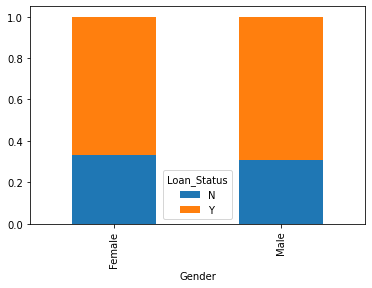

In [32]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked=True)

It can be inffered that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

Now let's visulaize remaning categorical varibles VS Target Variables

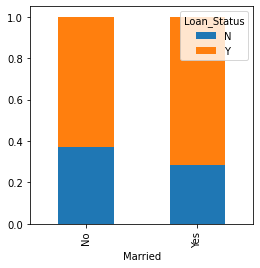

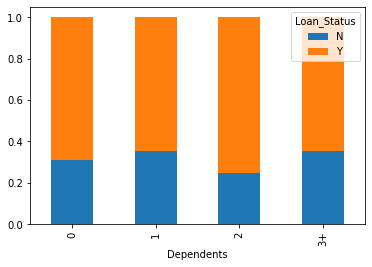

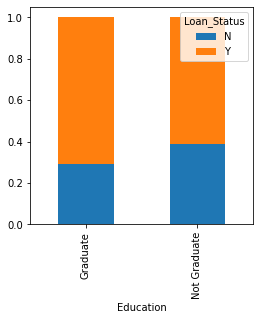

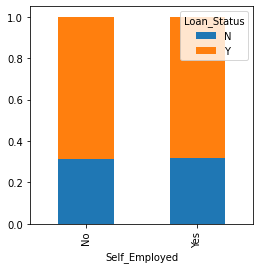

In [33]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])

Dependents = pd.crosstab(train['Dependents'], train[ 'Loan_Status' ])

Education = pd.crosstab(train['Education'],train['Loan_Status'])

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize= (4,4))
plt.show()

Dependents.div(Dependents.sum (1).astype(float),axis=0).plot(kind="bar", stacked=True) 
plt.show()

Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize= (4,4)) 
plt. show()

Self_Employed.div(Self_Employed.sum(1). astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4)) 
plt.show()

* Proportion of married applicants is higher for the approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of
Loan_Status.

* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and
Loan _Status.

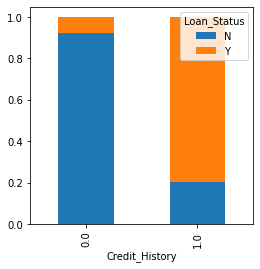

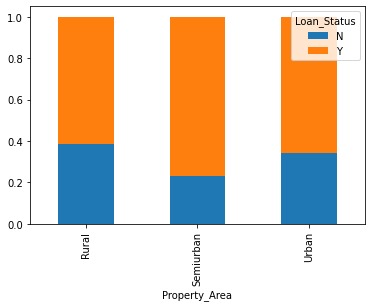

In [34]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])

Property_Area=pd.crosstab(train[ 'Property_Area'], train[ 'Loan_Status' ])

Credit_History.div(Credit_History.sum (1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize= (4,4)) 
plt.show()

Property_Area.div (Property_Area.sum(1) .astype(float), axis=0). plot (kind="bar", stacked=True) 
plt.show()

* It seems people with credit history as 1 are more likely to get their loans approved.
* Proportion of loans getting approved in semiurban area is higher as compared to that in
rural or urban areas.

Now let's visualize numerical independent variables with respect to target variable.

Numerical Independent Variable vs Target Variable


We will try to find the mean income of people for which the loan has been approved vs the mean
income of people for which the loan has not been approved.


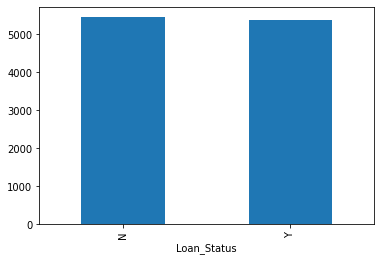

In [35]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar ()


Here the y-axis represents the mean applicant income.
 *  We don't see any change in the mean
income. 
* So, let's make bins for the applicant income variable based on the values in it and analyze
the corresponding loan status for each bin.


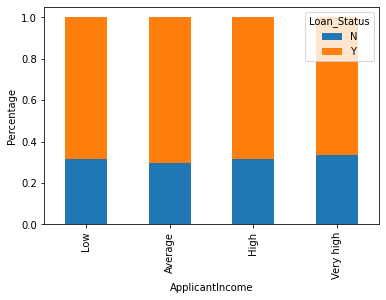

In [36]:
bins = [0,2500,4000,6000,81000] 
group = [ 'Low', 'Average', 'High','Very high']

train["Income_bin"] = pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'] )

Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True) 

plt.xlabel ('ApplicantIncome') 
P = plt.ylabel ('Percentage')

In [37]:
train["Income_bin"].head(10)

0         High
1         High
2      Average
3      Average
4         High
5         High
6          Low
7      Average
8         High
9    Very high
Name: Income_bin, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very high']

In [38]:
train_original["ApplicantIncome"].head(10)

0     5849
1     4583
2     3000
3     2583
4     6000
5     5417
6     2333
7     3036
8     4006
9    12841
Name: ApplicantIncome, dtype: int64

* It can be inferred that Applicant income does not affect the chances of loan approval which
contradicts our hypothesis in which we assumed that if the applicant income is high the chances
of loan approval will also be high. 

We will analyze the coapplicant income and loan amount variable in similar manner.


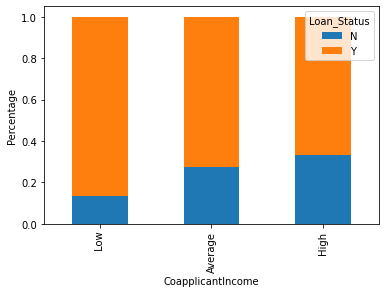

In [39]:
bins=[0,1000,3000,42000] 
group=[' Low','Average','High' ]
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])

Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel ('CoapplicantIncome') 

p = plt.ylabel('Percentage')

In [40]:
train['ApplicantIncome'][train["CoapplicantIncome"] == 0].count()

273

* It shows that if coapplicant's income is less the chances of loan approval are high. 
* But this does
not look right. 
* The possible reason behind this may be that most of the applicants don't have any
coapplicant so the coapplicant income for such applicants is O and hence the loan approval is not
dependent on it. 
* So we can make a new variable in which we will combine the applicant's and
coapplicant's income to visualize the combined effect of income on loan approval.

* Let us combine the Applicant Income and Coapplicant Income and see the combined effect of
Total Income on the Loan Status.

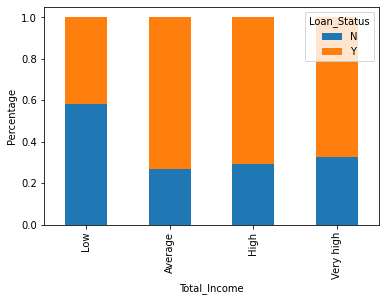

In [41]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 
group=[ 'Low', 'Average', 'High','Very high' ]

train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 

Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True) 
plt.xlabel ( 'Total_Income') 
P =plt.ylabel ( 'Percentage' )

* We can see that Proportion of loans getting approved for applicants having low Total_Income is
very less as compared to that of applicants with Average, High and Very High Income.

* Let's visualize the Loan amount variable.


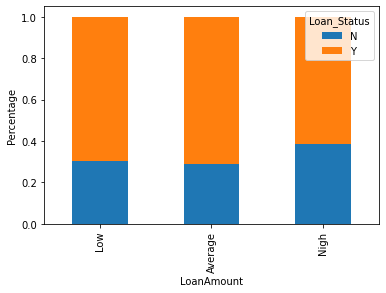

In [42]:
bins=[0,100,200,700] 
group=['Low', 'Average', 'Nigh' ]
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])

LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot (kind="bar",stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

* It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount
as compared to that of High Loan Amount which supports our hypothesis in which we
considered that the chances of loan approval will be high when the loan amount is less.

Let's drop the bins which we created for the exploration part. We will change the 3+ in
dependents variable to 3 to make it a numerical variable.

We will also convert the target
variable's categories into 0 and 1 so that we can find its correlation with numerical variables.

One more reason to do so is few models like logistic regression takes only numeric values as
input. We will replace N with O and Y with 1.


In [43]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

In [44]:
train=train.drop (['Income_bin','Coapplicant_Income_bin','Total_Income','Total_Income_bin',"LoanAmount_bin"],axis=1)

train['Dependents'].replace ('3+',3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status' ].replace('N',0, inplace=True)
train['Loan_Status' ].replace ('Y', 1, inplace=True)


Now lets look at the correlation between all the numerical variables. We will use the heat map to
visualize the correlation. Heatmaps visualize data through variations in coloring. The variables
with darker color means their correlation is more.

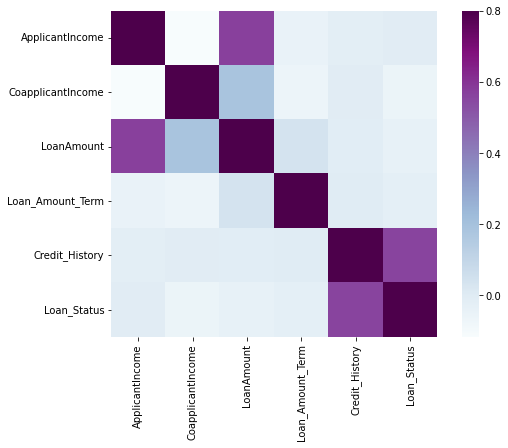

In [45]:
matrix  = train.corr()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, square = True, cmap = "BuPu")

We see that the most correlated variables are ( ApplicantIncome - LoanAmmount) and ( Credit_Histroy - Loan_Status) Loan Ammount is also correlated with CoapplicantIncome

After exploring all the variables in our data, we can now impute the missing values and treat the
outliers because missing data and outliers can have adverse effect on the model performance.

## Missing value imputation
Let's list out feature-wise count of missing values.


In [46]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount,
Loan Amount Term and Credit History features.

We will treat the missing values in all the features one by one.
We can consider these methods to fill the missing values:
* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode


There are very less missing values in Gender, Married, Dependents, Credit_ History and
Self_Employed features so we can fill them using the mode of the features.

There are very less missing values in Gender,Married, Dependents, Self_Employed features so we can fill them using the mode of the features.


In [47]:
train[ 'Gender'].fillna(train['Gender'].mode()[0], inplace=True)

train['Married' ].fillna(train['Married' ].mode()[0], inplace=True)

train[ 'Dependents' ].fillna(train[ 'Dependents' ].mode()[0], inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True) 

train['Credit_History'].fillna(train['Credit_History' ].mode()[0], inplace=True)


Now let's try to find a way to fill the missing values in Loan_Amount_Term. We will look at the
value count of the Loan amount term variable.


In [48]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we
will replace the missing values in this variable using the mode of this variable.


In [49]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or
median to impute the missing values. 

We will use median to fill the null values as earlier we saw
that loan amount have outliers so the mean will not be the proper approach as it is highly
affected by the presence of outliers.

In [50]:

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


Now lets check whether all the missing values are filled in the dataset.


In [51]:
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [55]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

test['Married' ].fillna(train['Married' ].mode()[0], inplace=True)

test[ 'Dependents' ].fillna(train[ 'Dependents' ].mode()[0], inplace=True)

test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True) 

test['Credit_History'].fillna(train['Credit_History' ].mode()[0], inplace=True)

test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term' ].mode()[0], inplace=True)



In [54]:
test['LoanAmount'].fillna(train['LoanAmount' ].mode()[0], inplace=True)

As we can see that all the missing values have been filled in the test dataset. Let's fill all the
missing values in the test dataset too with the same approach.

# Outlier Treatment
As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them
as the presence of outliers affects the distribution of the data. Let's examine what can happen to
a data set with outliers. For the sample data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4

We find the following: mean, median, mode, and standard deviation

* Mean = 2.58
* Median = 2.5
* Mode = 2

* Standard Deviation = 1.08

If we add an outlier to the data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400

The new values of our statistics are:

* Mean = 35.38
* Median = 2.5
* Mode = 2
* Standard Deviation = 114.74


It can be seen that having outliers often has a significant effect on the mean and standard
deviation and hence affecting the distribution. 
* We must take steps to remove outliers from our
data sets.
* Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer.
This is called right skewness. 
* One way to remove the skewness is by doing the log
transformation. As we take the log transformation, it does not affect the smaller values much,
but reduces the larger values. So, we get a distribution similar to normal distribution.

Let's visualize the effect of log transformation. We will do the similar changes to the test file
simultaneously.


In [ ]:
test['LoanAmount'].dtypes

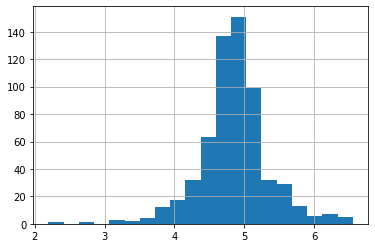

In [56]:
train['LoanAmount_log' ] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist (bins=20) 


In [57]:
#test['LoanAmount']= pd.to_numeric(test['LoanAmount'],errors = 'coerce')

#test['LoanAmount'] = test['LoanAmount'].apply(lambda x: float(x))


#test['LoanAmount'] = pd.to_numeric(test['LoanAmount'])
test[ 'LoanAmount_log'] = np.log(test['LoanAmount'])

In [ ]:
test['LoanAmount_log']

In [ ]:
test.columns

In [ ]:
train_original.columns

In [ ]:


# test['Gender'] = test['Gender'].fillna(train_original['Gender'].mode()[0])
# test['Dependents'] = test['Dependents']. fillna(train_original[ 'Dependents'].mode()[0])
# test['Self_Employed'] = test['Self_Employed'].fillna(train_original['Self_Employed' ].mode()[0]) 
# test['Credit_History'] = test['Credit_History'].fillna(train_original['Credit_History' ].mode()[0])
# test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(train_original['Loan_Amount_Term'].mode()[0]) 
# test['LoanAmount'] = test['LoanAmount'].fillna(train_original['LoanAmount'].median)

Now the distribution looks much closer to normla and effect of extreme values has been significantly subsided. Let's build a logistic regression model and make predictions for the test datasets.

The process of model building is not complete without evaluation of model's performance.

* Suppose we have the predictions from the model, how can we decide whether the predictions
are accurate? 
* We can plot the results and compare them with the actual values, i.e. calculate the
distance between the predictions and actual values. Lesser this distance more accurate will be
the predictions. 
* Since this is a classification problem, we can evaluate our models using any one
of the following evaluation metrics:

1. Accuracy: Let us understand it using the confusion matrix which is a tabular
representation of Actual vs Predicted values. This is how a confusion matrix looks like:

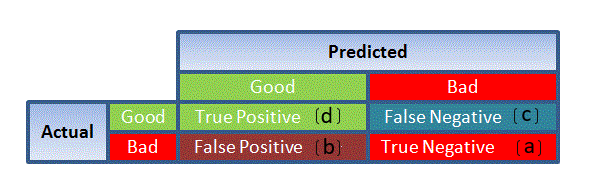

* True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
* True Negative - Targets which are actually false(N) and we have predicted them false(N)
* False Positive - Targets which are actually false(N) but we have predicted them true(T)
* False Negative - Targets which are actually true(T) but we have predicted them false(N)

Using these values, we can calculate the accuracy of the model. The accuracy is given by:

( True Positive + True Negatives ) / ( True Positive + True Negatives + False Positives + False Negatives )


* Precision: It is a measure of correctness achieved in true prediction i.e. of observations
labeled as true, how many are actually labeled true.

Precision = TP/ (TP + FP)

* Recall(Sensitivity) - It is a measure of actual observations which are predicted correctly i.e.
how many observations of true class are labeled correctly. It is also known as 'Sensitivity!

Recall = TP / (TP + FN)

* Specificity - It is a measure of how many observations of false class are labeled correctly.

Specificity = TN / (TN + FP)

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

* ROC curve
* Receiver Operating Characteristic(ROC) summarizes the model's performance by
evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1-
specificity).
* The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a
perfect performance metric for ROC curve. Higher the area under curve, better the
prediction power of the model.
This is how a ROC curve looks like:

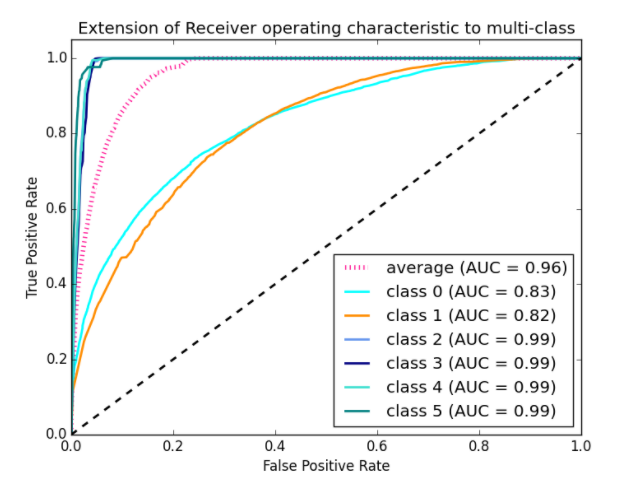

* The area of this curve measures the ability of the model to correctly classify true positives
and true negatives. We want our model to predict the true classes as true and false classes
as false.
* So it can be said that we want the true positive rate to be 1. But we are not concerned with
the true positive rate only but the false positive rate too. For example in our problem, we
are not only concerned about predicting the Y classes as Y but we also want N classes to be
predicted as N.
* We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in
the above example.
* For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for
class 2 the true positive rate is 1 at the same false positive rate. So, the AUC for class 2 will
be much more as compared to the AUC for class 1. So, the model for class 2 will be better.
* The class 2,3,4 and 5 model will predict more accurately as compared to the class 0 and 1
model as the AUC is more for those classes.
At the competition's page, it has been mentioned that our submission data would be evaluated
based on the accuracy. Hence, we will use accuracy as our evaluation metric.

Let us make our first model to predict the target variable. We will start with Logistic Regression
which is used for predicting binary outcome.
* Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 /
O, Yes / No, True / False) given a set of independent variables.
* Logistic regression is an estimation of Logit function. Logit function is simply a log of odds
in favor of the event.
* This function creates a s-shaped curve with the probability estimate, which is very similar
to the required step wise function


Lets drop the Loan ID variable as it do not have any effect on the loan status. We Will do the
same changes to the test dataset which we did for the training dataset.


In [58]:
train = train.drop ('Loan_ID', axis=1)
test = test.drop ('Loan_ID', axis=1)


We will use scikit-learn (sklearn) for making different models which is an open source library for
Python. It is one of the most efficient tool which contains many inbuilt functions that can be used
for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable
from the train dataset and save it in another dataset.

In [59]:
X = train.drop ('Loan_Status',1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns
categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. 

* Let
us understand the process of dummies first:
Consider the "Gender" variable. It has two classes, Male and Female.
* As logistic regression takes only the numerical values as input, we have to change male and
female into numerical value.
* Once we apply dummies to this variable, it will convert the "Gender" variable into two
variables(Gender Male and Gender_Female), one for each class, i.e. Male and Female.
Gender Male will have a value of O if the gender is Female and a value of 1 if the gender is
Male.

In [60]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)


Now we will train the model on training dataset and makepredictions for the test dataset. But
can we validate these predictions? 

One way of doing this is we can divide our train dataset into
two parts: train and validation. 

We can train the model on this train part and using that make
predictions for the validation part. In this way we can validate our predictions as we have the
true predictions for the validation part (which we do not have for the test dataset).

We will use the train _test_split function from sklearn to divide our train dataset. So, first let us
importtrain test split.

The dataset has been divided into training and validation part. Let us import LogisticRegression
and accuracy_score from sklearn and fit the logistic regression model.

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr',n_jobs = 1,penalty='l2', random_state=1, solver='liblinear', tol = 0.0001,verbose=0, warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

Here the C parameter represents inverse of regularization strength. Regularization is applying a
penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller
values of C specify stronger regularization.

In [64]:
pred_cv = model.predict(x_cv)

In [65]:
accuracy_score(y_cv, pred_cv)

0.8216216216216217

In [66]:
pred_test = model.predict(test)

In [67]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)

pd.DataFrame(submission, columns = ['Loan_ID' , 'Loan_Status']).to_csv('logistic.csv')
